# Bank Marketing Optimization 

1) Importing the libraries

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from imblearn.over_sampling import SMOTE
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

2) Loading the dataset
   URL: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [145]:
data=pd.read_csv("bank-full.csv",sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [146]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [147]:
data.shape

(45211, 17)

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [149]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [150]:
df=data.drop('duration',axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [151]:
#Check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [152]:
sns.set(style="whitegrid")

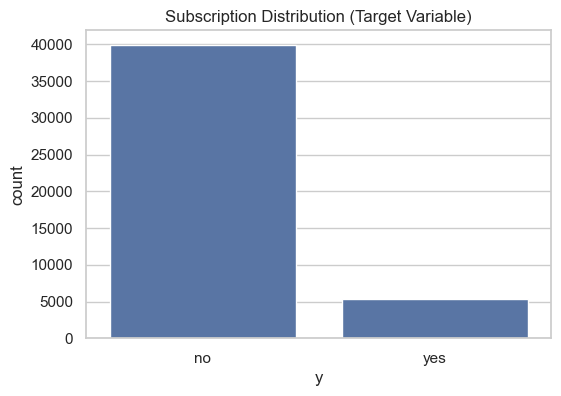

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [153]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='y')
plt.title("Subscription Distribution (Target Variable)")
plt.show()

print(data['y'].value_counts(normalize=True) * 100)

Insight

Around 89% customers say NO.
Only 11% subscribe → dataset is imbalanced.

-> Bank wastes effort calling too many low-probability customers.

Text(0.5, 1.0, 'Age Distribution')

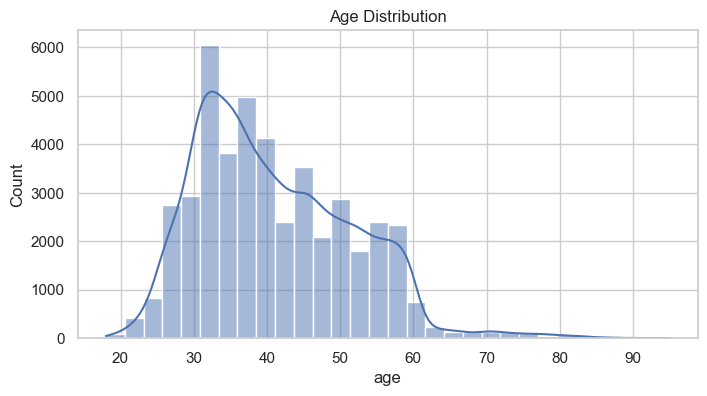

In [154]:
plt.figure(figsize=(8,4))
sns.histplot(df["age"],bins=30,kde=True)
plt.title("Age Distribution")

Insight

Customer age ranges mostly between 25–60.
Slight right-skew due to older customers.

In [155]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [156]:
df.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '<30'),
  Text(1, 0, '30-40'),
  Text(2, 0, '40-50'),
  Text(3, 0, '50-60'),
  Text(4, 0, '60+')])

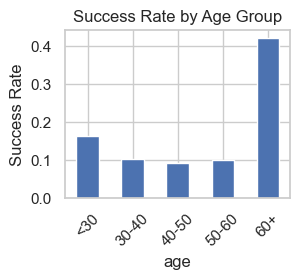

In [157]:
plt.subplot(2, 2, 2)
age_groups = pd.cut(data['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])
success_by_age = df.groupby(age_groups)['y'].mean()
success_by_age.plot(kind='bar')
plt.title('Success Rate by Age Group')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)

Insight

Older customers have higher subscription rate.
Younger customers say "no" more often.

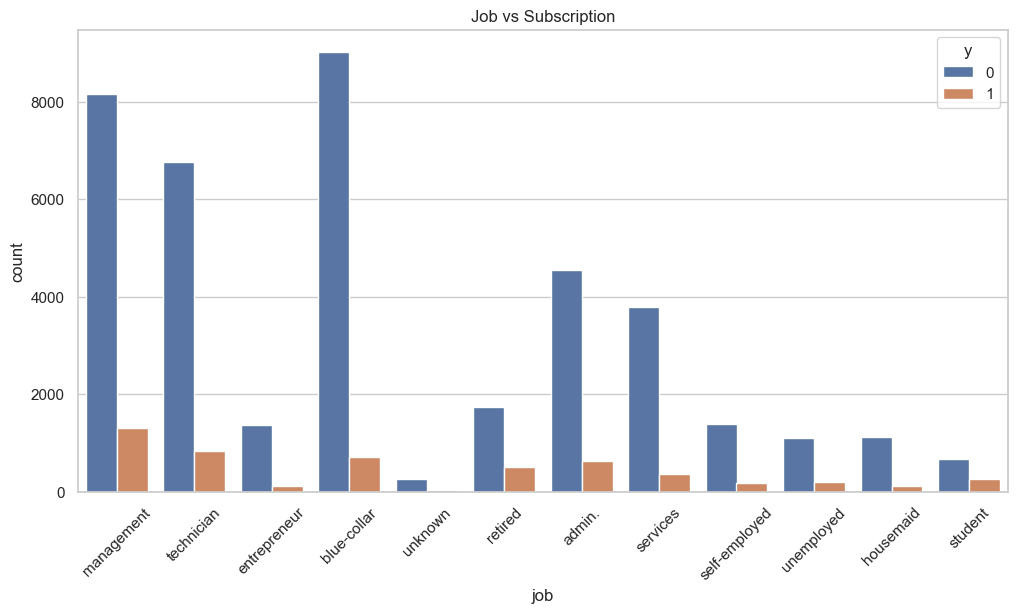

In [158]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title("Job vs Subscription")
plt.show()

Insight

Students + Retired respond best.
Blue-collar & management have lower subscription rates.

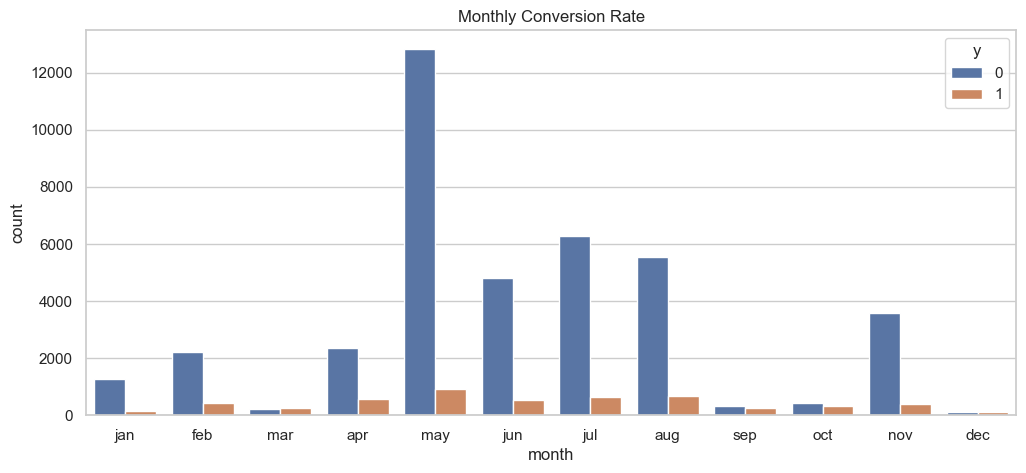

In [159]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='month', hue='y',
              order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
plt.title("Monthly Conversion Rate")
plt.show()

Insight

March, September, October, December → highest conversion.
May has the highest number of calls but lowest conversion (inefficient).

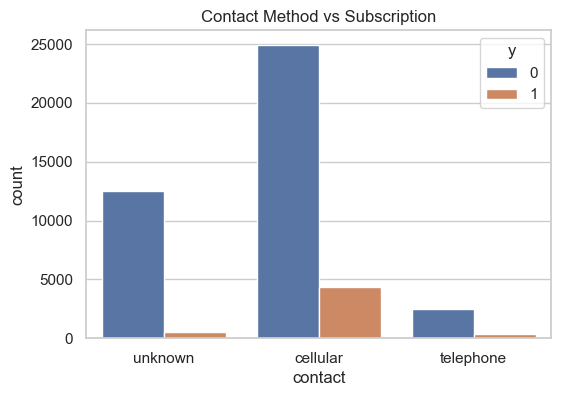

In [160]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='contact', hue='y')
plt.title("Contact Method vs Subscription")
plt.show()

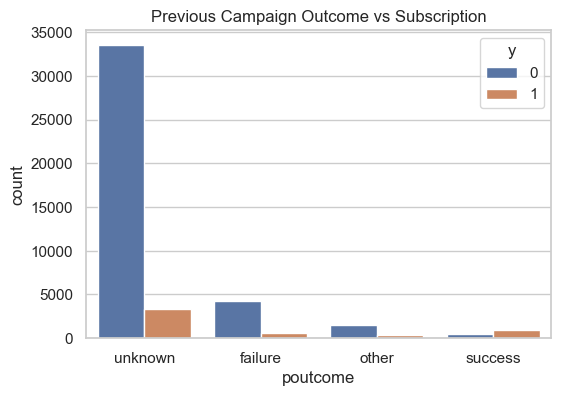

In [161]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='poutcome', hue='y')
plt.title("Previous Campaign Outcome vs Subscription")
plt.show()

Insight

If previous outcome = “success”, current subscription rate becomes very high.

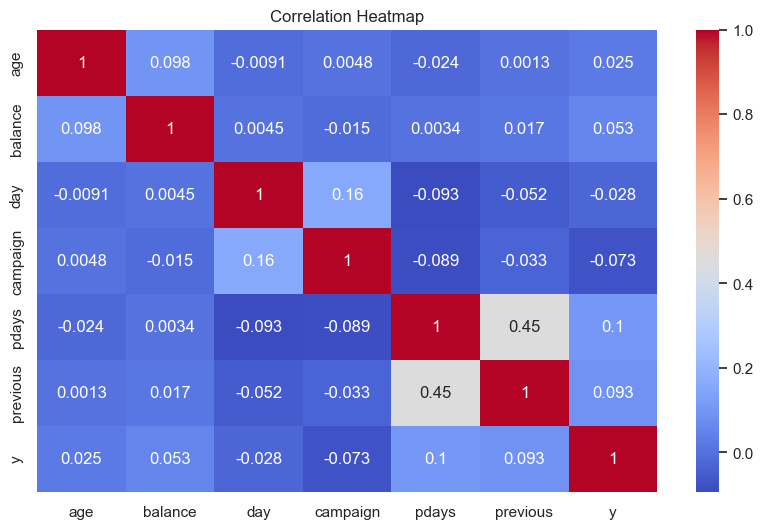

In [162]:
numeric=df.select_dtypes(include=["number"])
corr=numeric.corr()['y'].sort_values(ascending=False)
corr
plt.figure(figsize=(10,6))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [163]:
for col in data.select_dtypes(include=['object']).columns:
    df[col] = df[col].replace('unknown', np.nan)

In [164]:
df.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [165]:
# Fill missing categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [166]:
X = df.drop('y', axis=1)
y = df['y']


In [167]:
 X = pd.get_dummies(X, drop_first=True)

In [168]:
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

In [169]:

#stratify to preserve the ratio of yes/no in both training and testing sets since the dataset is imbalanced.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [170]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

Before SMOTE: y
0    31937
1     4231
Name: count, dtype: int64
After SMOTE: y
0    31937
1    31937
Name: count, dtype: int64


# 1. Customer Segmentation (Clustering)

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Remove target column
segmentation_data = df.drop("y", axis=1)

# Keep only numeric columns
segmentation_data = segmentation_data.select_dtypes(include=['int64','float64'])

scaler = StandardScaler()
seg_scaled = scaler.fit_transform(segmentation_data)


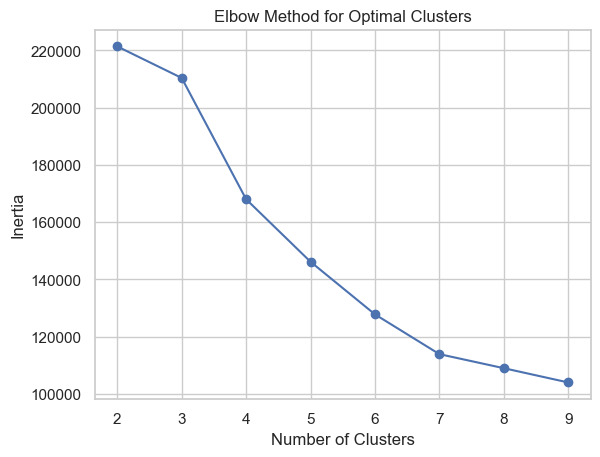

In [172]:

inertia = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(seg_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [173]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(seg_scaled)

df["Cluster"] = clusters


In [174]:
segment_profile = df.groupby("Cluster").mean(numeric_only=True)
segment_profile

,age,balance,day,campaign,pdays,previous,y
Cluster,,,,,,,
0,40.409307,1460.825839,22.759410,2.467623,3.589174,0.080877,0.096320
1,41.635340,1223.509975,8.495853,2.207016,2.758742,0.085519,0.114044
2,40.661037,1177.544632,21.961399,14.762364,0.003016,0.022919,0.043426
3,40.640478,1498.462761,13.902361,2.113079,257.279443,3.501060,0.203149


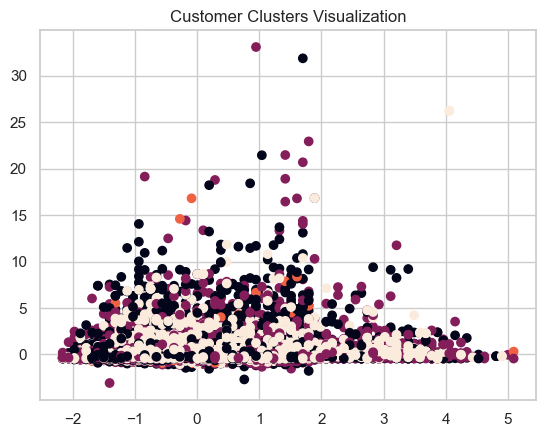

In [175]:
plt.scatter(seg_scaled[:,0], seg_scaled[:,1], c=clusters)
plt.title("Customer Clusters Visualization")
plt.show()

# 2. Model Predicition

In [176]:
scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

# =======================
# 5. TRAIN MODELS
# =======================

# Logistic Regression
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_sm_scaled, y_train_sm)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_sm, y_train_sm)

# XGBoost
xgb_model = xgb.XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_sm, y_train_sm)

# =======================
# 6. EVALUATE MODELS
# =======================

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "XGBoost": xgb_model
}

for name, model in models.items():
    if name == "Logistic Regression":
        preds = model.predict(X_test_scaled)
    else:
        preds = model.predict(X_test)

    print("\n==============================")
    print(f" MODEL: {name}")
    print("==============================")
    print(classification_report(y_test, preds))


 MODEL: Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      7985
           1       0.24      0.50      0.32      1058

    accuracy                           0.75      9043
   macro avg       0.58      0.64      0.59      9043
weighted avg       0.84      0.75      0.79      9043


 MODEL: Random Forest
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7985
           1       0.49      0.34      0.40      1058

    accuracy                           0.88      9043
   macro avg       0.70      0.65      0.67      9043
weighted avg       0.87      0.88      0.87      9043


 MODEL: XGBoost
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7985
           1       0.56      0.30      0.39      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.63      0.67      9043
weigh

# Hypertunning

In [177]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# 2. Define the hyperparameter search space
# These parameters directly impact model complexity and performance
param_distributions = {
    'n_estimators': randint(100, 500),         # Number of boosting rounds
    'max_depth': randint(3, 10),               # Maximum depth of a tree
    'learning_rate': uniform(0.01, 0.3),       # Step size shrinkage used to prevent overfitting
    'gamma': uniform(0, 0.5),                  # Minimum loss reduction required to make a further partition
    'colsample_bytree': uniform(0.6, 0.4),     # Subsample ratio of columns when constructing each tree
    'subsample': uniform(0.6, 0.4)             # Subsample ratio of the training instance
}

# 3. Setup the Randomized Search
# Scoring: Use 'f1' on the positive class (Class 1) as a balanced metric for the imbalanced dataset
# cv=5: 5-fold cross-validation
# n_iter=50: Search 50 different parameter combinations (adjust based on compute time)
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='f1', 
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# 4. Perform the search (using the SMOTE-resampled data for cleaner training)
print("Starting Randomized Hyperparameter Search for XGBoost...")
random_search.fit(X_train_sm, y_train_sm)

# 5. Get the best model
xgb_tuned = random_search.best_estimator_

print("\nTuned XGBoost Model Results")
print("---------------------------------------")
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best F1-Score (Cross-Validation): {random_search.best_score_:.4f}")


Starting Randomized Hyperparameter Search for XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Tuned XGBoost Model Results
---------------------------------------
Best Parameters: {'colsample_bytree': np.float64(0.8447411578889518), 'gamma': np.float64(0.06974693032602092), 'learning_rate': np.float64(0.09764339456056544), 'max_depth': 9, 'n_estimators': 289, 'subsample': np.float64(0.6362425738131283)}
Best F1-Score (Cross-Validation): 0.8973


In [178]:
# 6. Evaluate the tuned model on the test set
y_pred_tuned = xgb_tuned.predict(X_test)
print("\nFinal Evaluation on Test Set (using Optimal 0.5 Threshold):")
print(classification_report(y_test, y_pred_tuned))


Final Evaluation on Test Set (using Optimal 0.5 Threshold):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7985
           1       0.56      0.29      0.38      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.63      0.66      9043
weighted avg       0.87      0.89      0.87      9043



# 3. AI Explainability

In [179]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)


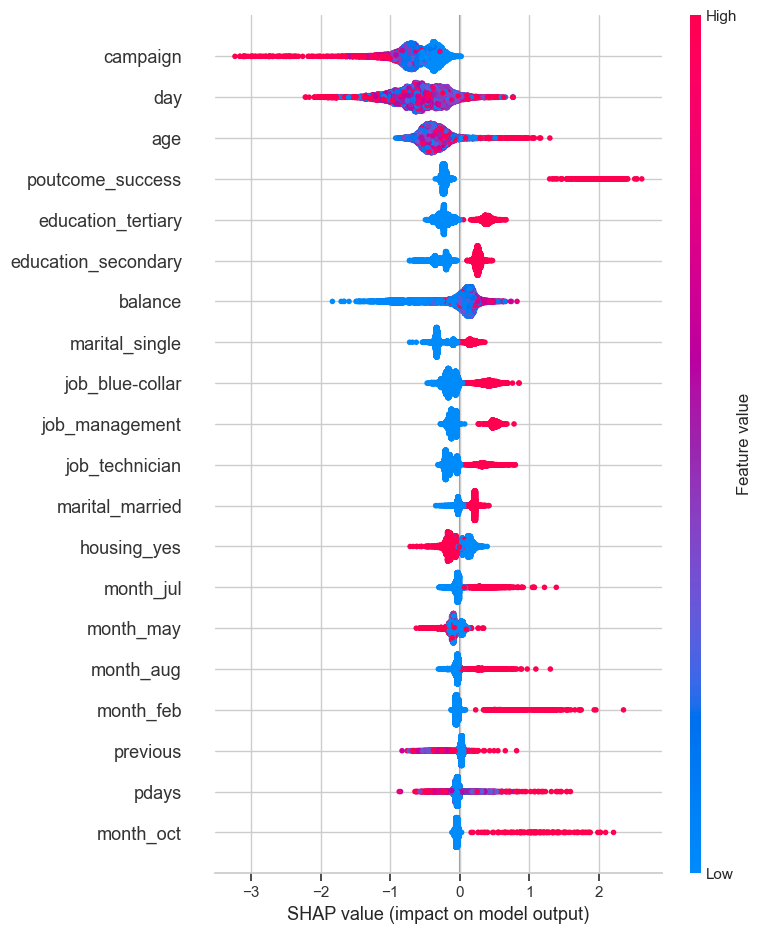

In [180]:
shap.summary_plot(shap_values, X_test)


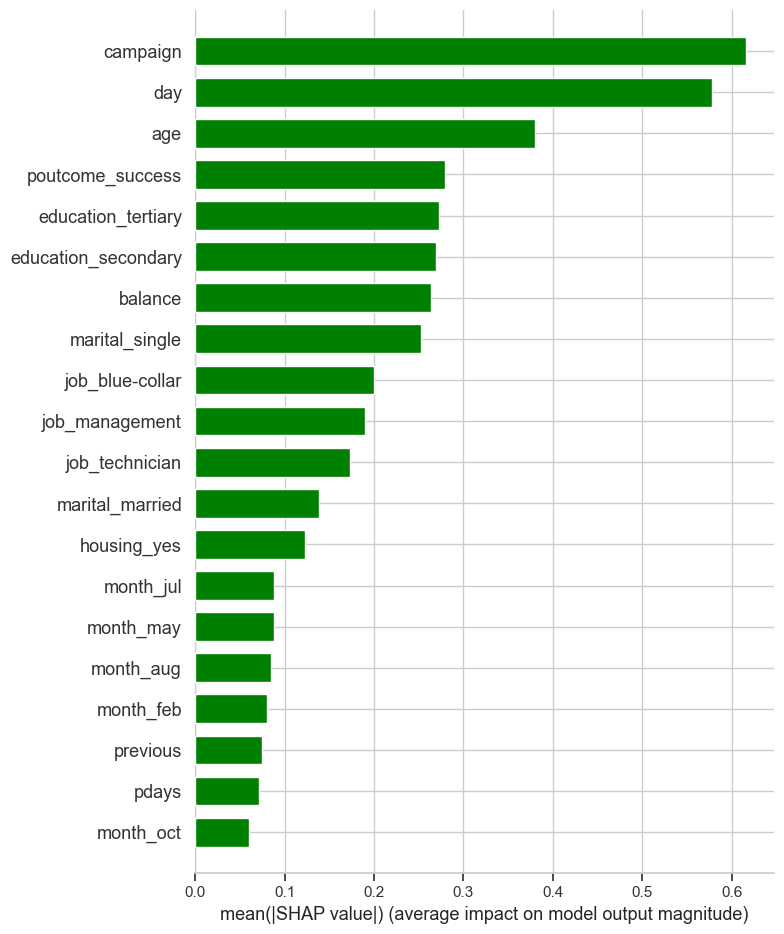

In [181]:
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", feature_names=X_test.columns,color="green")
#Shows top drivers of subscription probability
#Example: “pdays”, “previous”, “poutcome”, “month”, etc.

In [182]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

index = 5
shap.force_plot(
    explainer.expected_value,
    shap_values[index],
    X_test_scaled_df.iloc[index]
)
#Explains exactly why the model predicted YES/NO for that customer
#Useful for Objective 4 (Customer Retention Behavior

# 4. Optimize Contact Strategy

In [183]:
# Objective 3: Optimize Contact Strategy

print("Success rate by day:")
print(df.groupby('day')['y'].mean().sort_values(ascending=False))

print("\nSuccess rate by month:")
print(df.groupby('month')['y'].mean().sort_values(ascending=False))

print("\nOutcome of previous campaign (poutcome):")
print(df.groupby("poutcome")["y"].mean().sort_values(ascending=False))

Success rate by day:
day
1     0.279503
10    0.230916
30    0.173052
22    0.170166
3     0.164968
4     0.159170
25    0.158333
12    0.152215
13    0.152050
2     0.140758
15    0.139753
24    0.138702
16    0.135689
23    0.134185
27    0.133809
11    0.122380
9     0.114670
14    0.113636
5     0.112565
26    0.112077
8     0.109121
21    0.099210
18    0.098787
6     0.093685
17    0.090768
7     0.086406
28    0.078142
29    0.073926
31    0.071540
20    0.069767
19    0.069437
Name: y, dtype: float64

Success rate by month:
month
mar    0.519916
dec    0.467290
sep    0.464594
oct    0.437669
apr    0.196794
feb    0.166478
aug    0.110133
jun    0.102228
nov    0.101511
jan    0.101212
jul    0.090935
may    0.067195
Name: y, dtype: float64

Outcome of previous campaign (poutcome):
poutcome
success    0.647253
other      0.166848
failure    0.095652
Name: y, dtype: float64


# 5. ROI / Cost-Benefit Modeling

In [184]:
## Find Optimal Threshold for Maximum Profit

# Define costs and profit
COST_PER_CALL = 20
PROFIT_PER_CONVERSION = 2000
N_CUSTOMERS = len(X_test)
TOTAL_MAX_REVENUE = y_test.sum() * PROFIT_PER_CONVERSION

# Get prediction probabilities
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# 1. Calculate Net Profit for a range of thresholds
thresholds = np.linspace(0.01, 0.99, 100)
profit_metrics = []

for threshold in thresholds:
    y_pred_thresh = (y_prob >= threshold).astype(int)
    
    # True Positives: Successful Conversions
    conversions = (y_pred_thresh * y_test.values).sum()
    
    # Calls Made: All predicted 'yes' (TP + FP)
    calls_made = y_pred_thresh.sum()
    
    # Financial Metrics
    revenue = conversions * PROFIT_PER_CONVERSION
    cost = calls_made * COST_PER_CALL
    net_profit = revenue - cost
    
    profit_metrics.append({
        'threshold': threshold,
        'net_profit': net_profit,
        'conversions': conversions,
        'calls_made': calls_made,
        'ROI': (net_profit / cost) * 100 if cost > 0 else 0
    })

profit_df = pd.DataFrame(profit_metrics)
optimal_threshold = profit_df.loc[profit_df['net_profit'].idxmax()]

print("\n## Optimal Threshold Analysis")
print("-" * 30)
print(f"Optimal Threshold: {optimal_threshold['threshold']:.3f}")
print(f"Max Net Profit: ${optimal_threshold['net_profit']:,.2f}")
print(f"Conversions: {optimal_threshold['conversions']}")
print(f"Calls Made: {optimal_threshold['calls_made']}")
print(f"ROI: {optimal_threshold['ROI']:.2f}%")


## Optimal Threshold Analysis
------------------------------
Optimal Threshold: 0.010
Max Net Profit: $1,934,360.00
Conversions: 1057.0
Calls Made: 8982.0
ROI: 1076.80%


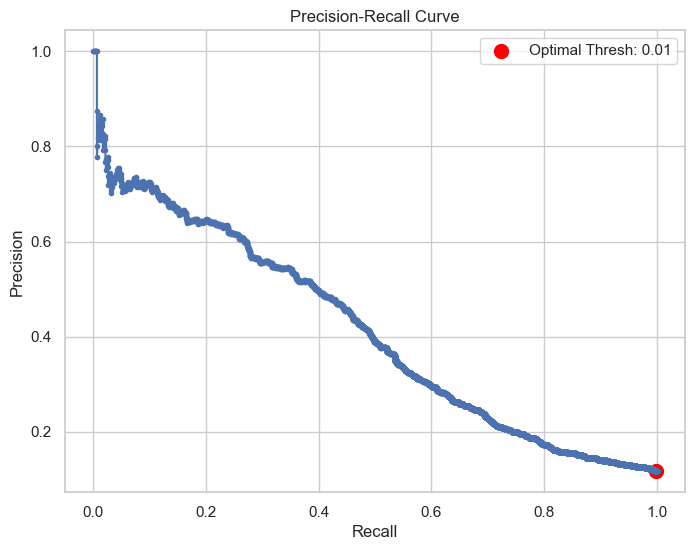

In [185]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Get predictions from the best model (XGBoost)
y_prob = xgb_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
# Add a marker for the optimal threshold from the previous step
opt_recall = recall[np.argmin(np.abs(thresholds - optimal_threshold['threshold']))]
opt_precision = precision[np.argmin(np.abs(thresholds - optimal_threshold['threshold']))]
plt.scatter(opt_recall, opt_precision, marker='o', color='red', s=100, label=f'Optimal Thresh: {optimal_threshold["threshold"]:.2f}')
plt.legend()
plt.show()
#

In [186]:
y_prob = xgb_model.predict_proba(X_test)[:,1]
threshold=0.5
y_pred_thresh = (y_prob>=threshold).astype(int)

n=len(X_test)
cost_before = n*COST_PER_CALL

n_call_after = y_pred_thresh.sum()
cost_after = n_call_after*COST_PER_CALL

expected_conversions = (y_pred_thresh * y_test.values).sum()
revenue_after = expected_conversions*PROFIT_PER_CONVERSION

savings = cost_before - cost_after
roi = (savings/cost_after)*100 if cost_after>0 else float('inf')

print("Cost before:", cost_before)
print("Cost after:", cost_after)
print("Calls made:", n_call_after)
print("Expected conversions:", expected_conversions)
print("Savings:", savings)
print("ROI:", roi,"%")


Cost before: 180860
Cost after: 11460
Calls made: 573
Expected conversions: 319
Savings: 169400
ROI: 1478.1849912739965 %
